# Week 1 Assignments

Keep in mind that for all of the simulations below, the default values have been chosen to highlight the differences in the Approximation methods and the empirical formulae.

## Simulating a ball dropped in uniform gravitational field

We will first import all the necessary libraries into python kernel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib.animation import FuncAnimation
plt.rcParams['figure.figsize'] = [12, 12] # to determine the size of the graphs

We can then start with modelling the ball using the Newton's laws of Motion and Gravitation. 
$$
m \cdot \frac{dv}{dt} = F = m \cdot g
$$
Using the Euler's method, we can write that-
$$m \cdot \frac{(v_2 - v_1 )}{\Delta t} = F = m \cdot g \Rightarrow v(t_2)= v(t_1) + g \cdot (t_2 - t_1)$$
Thus
$$v[n+1]=v[n]+ g\cdot step\_size$$
Applying Euler's method on $v(t)$ again-
$$h(t + \Delta t)= h(t)+ v(t)\cdot \Delta t$$
Converting all of this into array or list form-
$$h[n+1] = h[n] - v[n]\cdot step\_size$$



Further I will assume that $g = 9.80665$ and $h = 20$ meters.

In [2]:
time_step =9e-2 # Lower this to decrease %error in the euler estimate
g=9.60665
initial_height=20
upper_limit_of_time= 30 #at a higher upper limit, the estimate has lesser error than at a lower value of upper limit.

t= np.arange(0, upper_limit_of_time, 1)
v = np.array([0])
h = np.array([20])

for i in t:
    v=np.append(v, v[i] + g* time_step)

for i in t:
    h=np.append(h, h[i]-v[i]*time_step)

h=np.delete(h, [0])


Now let us plot $h$ v/s $t$ from the above Euler's method.

Just for the sake of checking it against the actual equations, we will construct a new variable $h_{actual}$

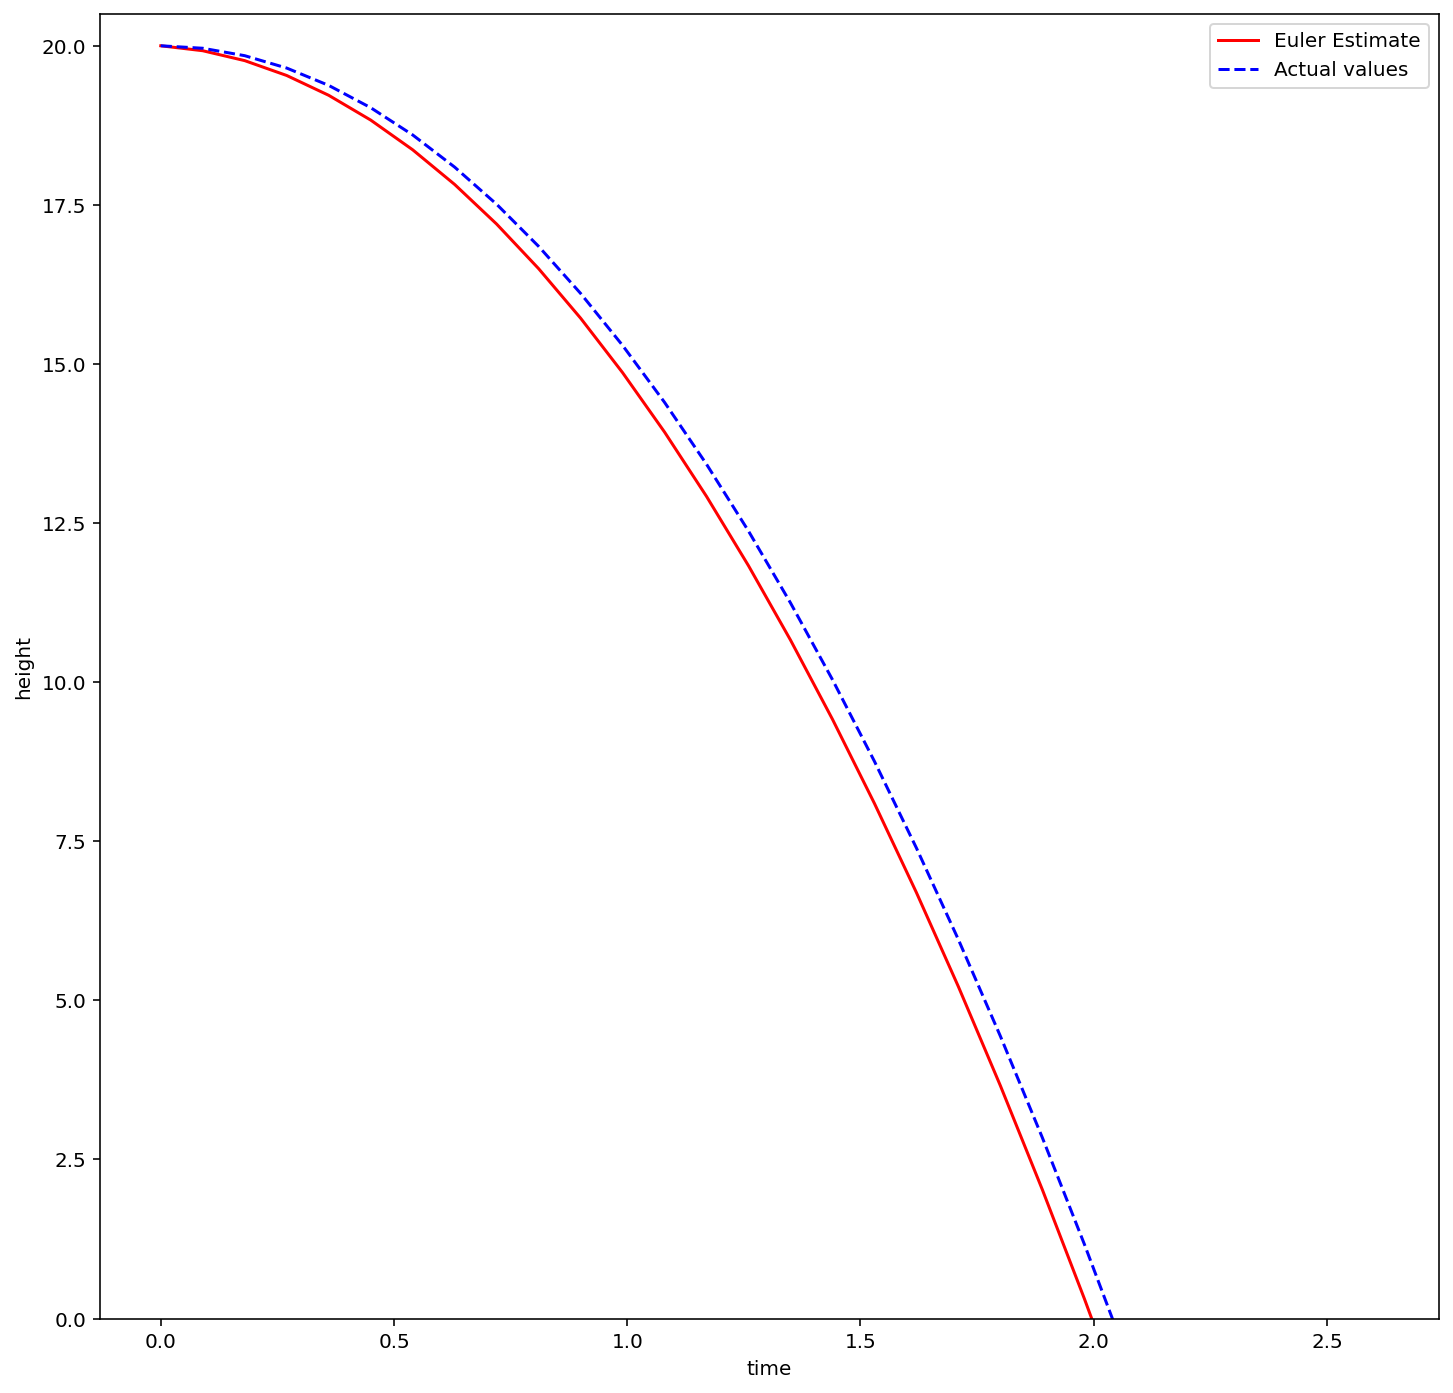

In [3]:
plt.plot(t*time_step, h, 'r', label='Euler Estimate')
h_actual=20 - 0.5 * g * (t*time_step)**2
plt.plot(t*time_step, h_actual, 'b--', label='Actual values')
plt.ylim(0, initial_height + 0.5)
plt.xlabel("time")
plt.ylabel("height")
plt.legend()

I did try to animate the above trajectory as a ball moving through space but as of now it has failed. Here is the attempt I made. Might be useful for my future self hence I am still keeping it despite it not working.



##Enable interactive plot
fig, ax = plt.subplots()

line,= ax.plot([])

#ax.set_ylim(-1.1, 1.1)

def animate(upper_limit):
    t= np.arange(0, upper_limit, 1)
    v = np.array([0])
    h = np.array([20])

    for i in t:
        v=np.append(v, v[i] + g* time_step)

    for i in t:
        h=np.append(h, h[i]-v[i]*time_step)

    h=np.delete(h, [len(h)-1])
    return h

anim = FuncAnimation(fig, animate, frames=100, interval=10)

plt.show()

## Simulating 2-D projectile motion using Euler's method

Now let us try to simulate the same but by assuming an initial horizontal velocity ($u_h$) and initial vertical velocity ($u_v$).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 20] # to determine the size of the graphs

We will use the same approximations and same values as the last case. So I won't bother writing them again.

Let us first try out the Euler Method

In [5]:
time_step =9e-2 # unit- s
g=9.60665 # unit- m/s2
initial_height=20 # unit- m
initial_vertical_velocity=3 # unit- m/s
initial_horizontal_velocity=4 # unit- m/s
upper_limit_of_time= 500 #at a higher upper limit, the estimate has lesser % error than at a lower value of upper limit.

t= np.arange(0, upper_limit_of_time, 1)
u_v = np.array([-initial_vertical_velocity])
u_h=initial_horizontal_velocity
h = np.array([initial_height]) #altitude
x= np.array([0]) #horizontal distance traversed

for i in t:
    u_v=np.append(u_v, u_v[i] + g* time_step)

for i in t:
    h=np.append(h, h[i]-u_v[i]*time_step)
    x=np.append(x, x[i] + u_h *time_step)

h=np.delete(h, [len(h)-1])
x=np.delete(x, [len(x)-1])

Plotting the graphs

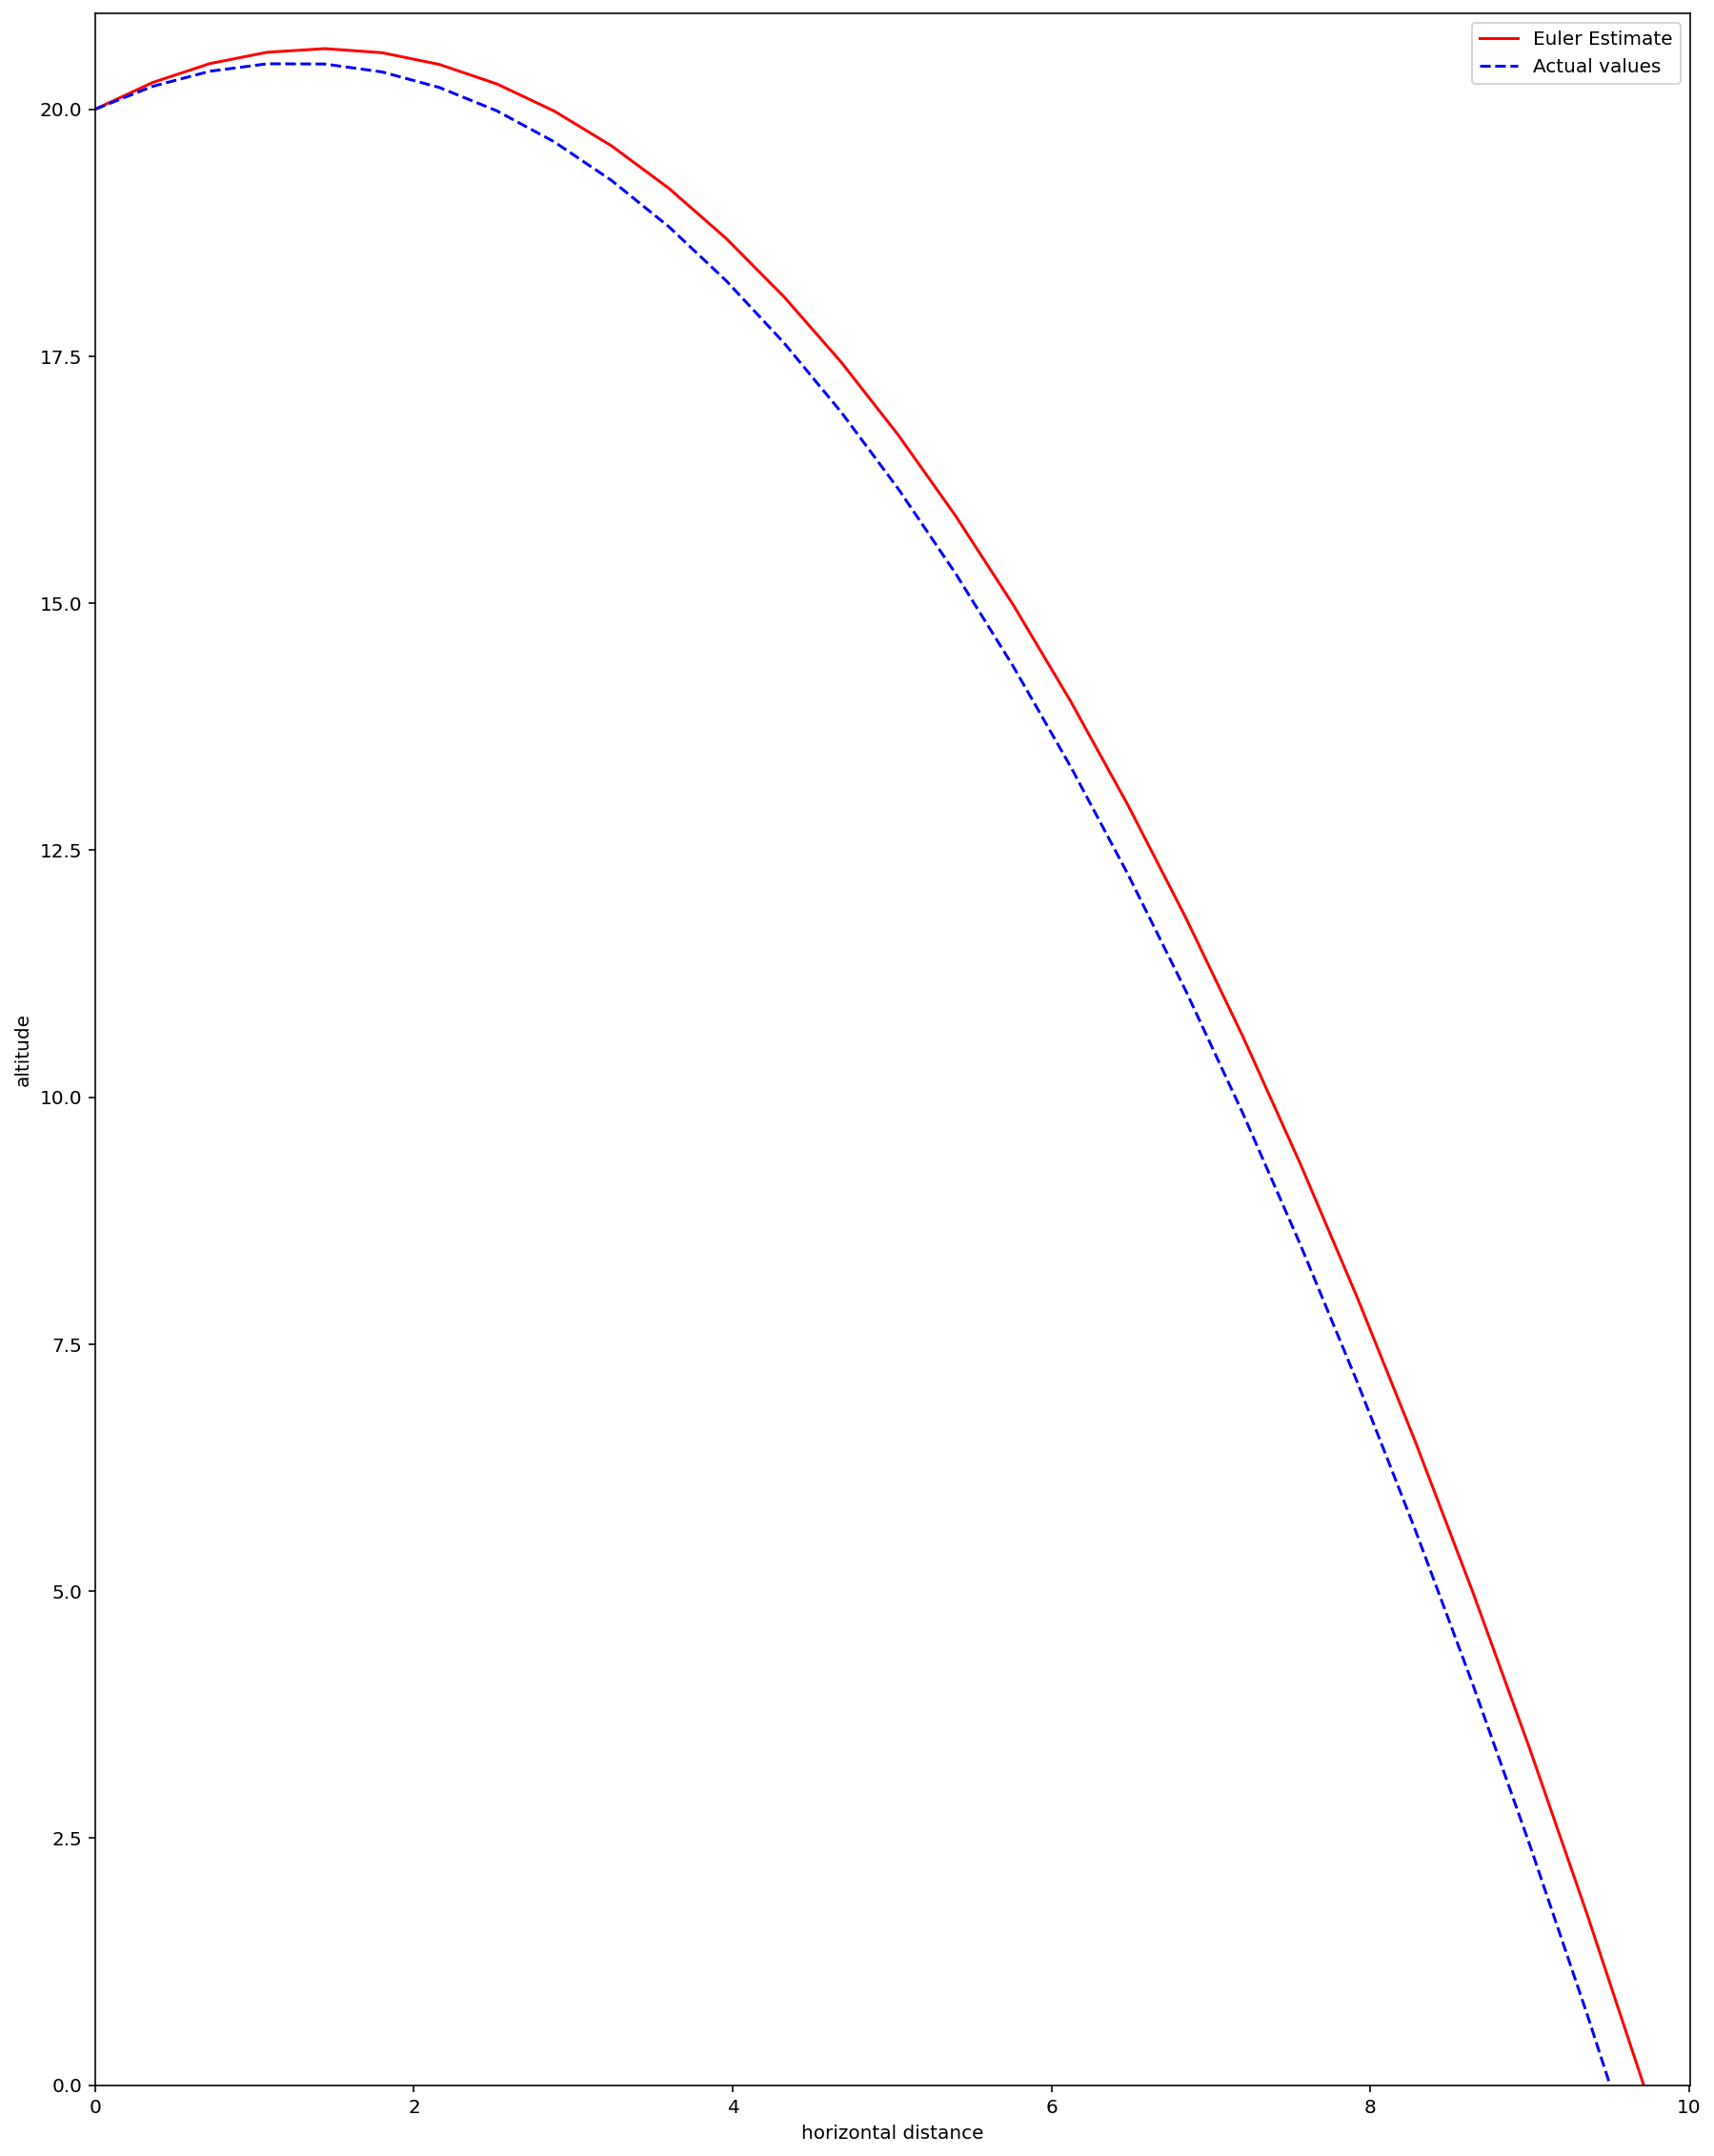

In [6]:
plt.plot(x, h, 'r', label='Euler Estimate')
h_actual=20 + initial_vertical_velocity* (t*time_step) - 0.5 * g * (t*time_step)**2
x_actual=initial_horizontal_velocity* (t*time_step)
plt.plot(x_actual, h_actual, 'b--', label='Actual values')
plt.ylim(0, initial_height+(initial_vertical_velocity**2)/(2* g)+ 0.5) # to ensure that the plot is perfectly zoomed in
plt.xlim(0, 2*initial_horizontal_velocity*initial_vertical_velocity/g + initial_horizontal_velocity*(-initial_vertical_velocity + (initial_vertical_velocity**2 + 2 * g * initial_height)**0.5)/(g) +0.5) #Again the same but with even worse math
plt.xlabel("horizontal distance")
plt.ylabel("altitude")
plt.legend()

Now that we have calculated the $x$ and $h$ arrays, we can plot them on a graph

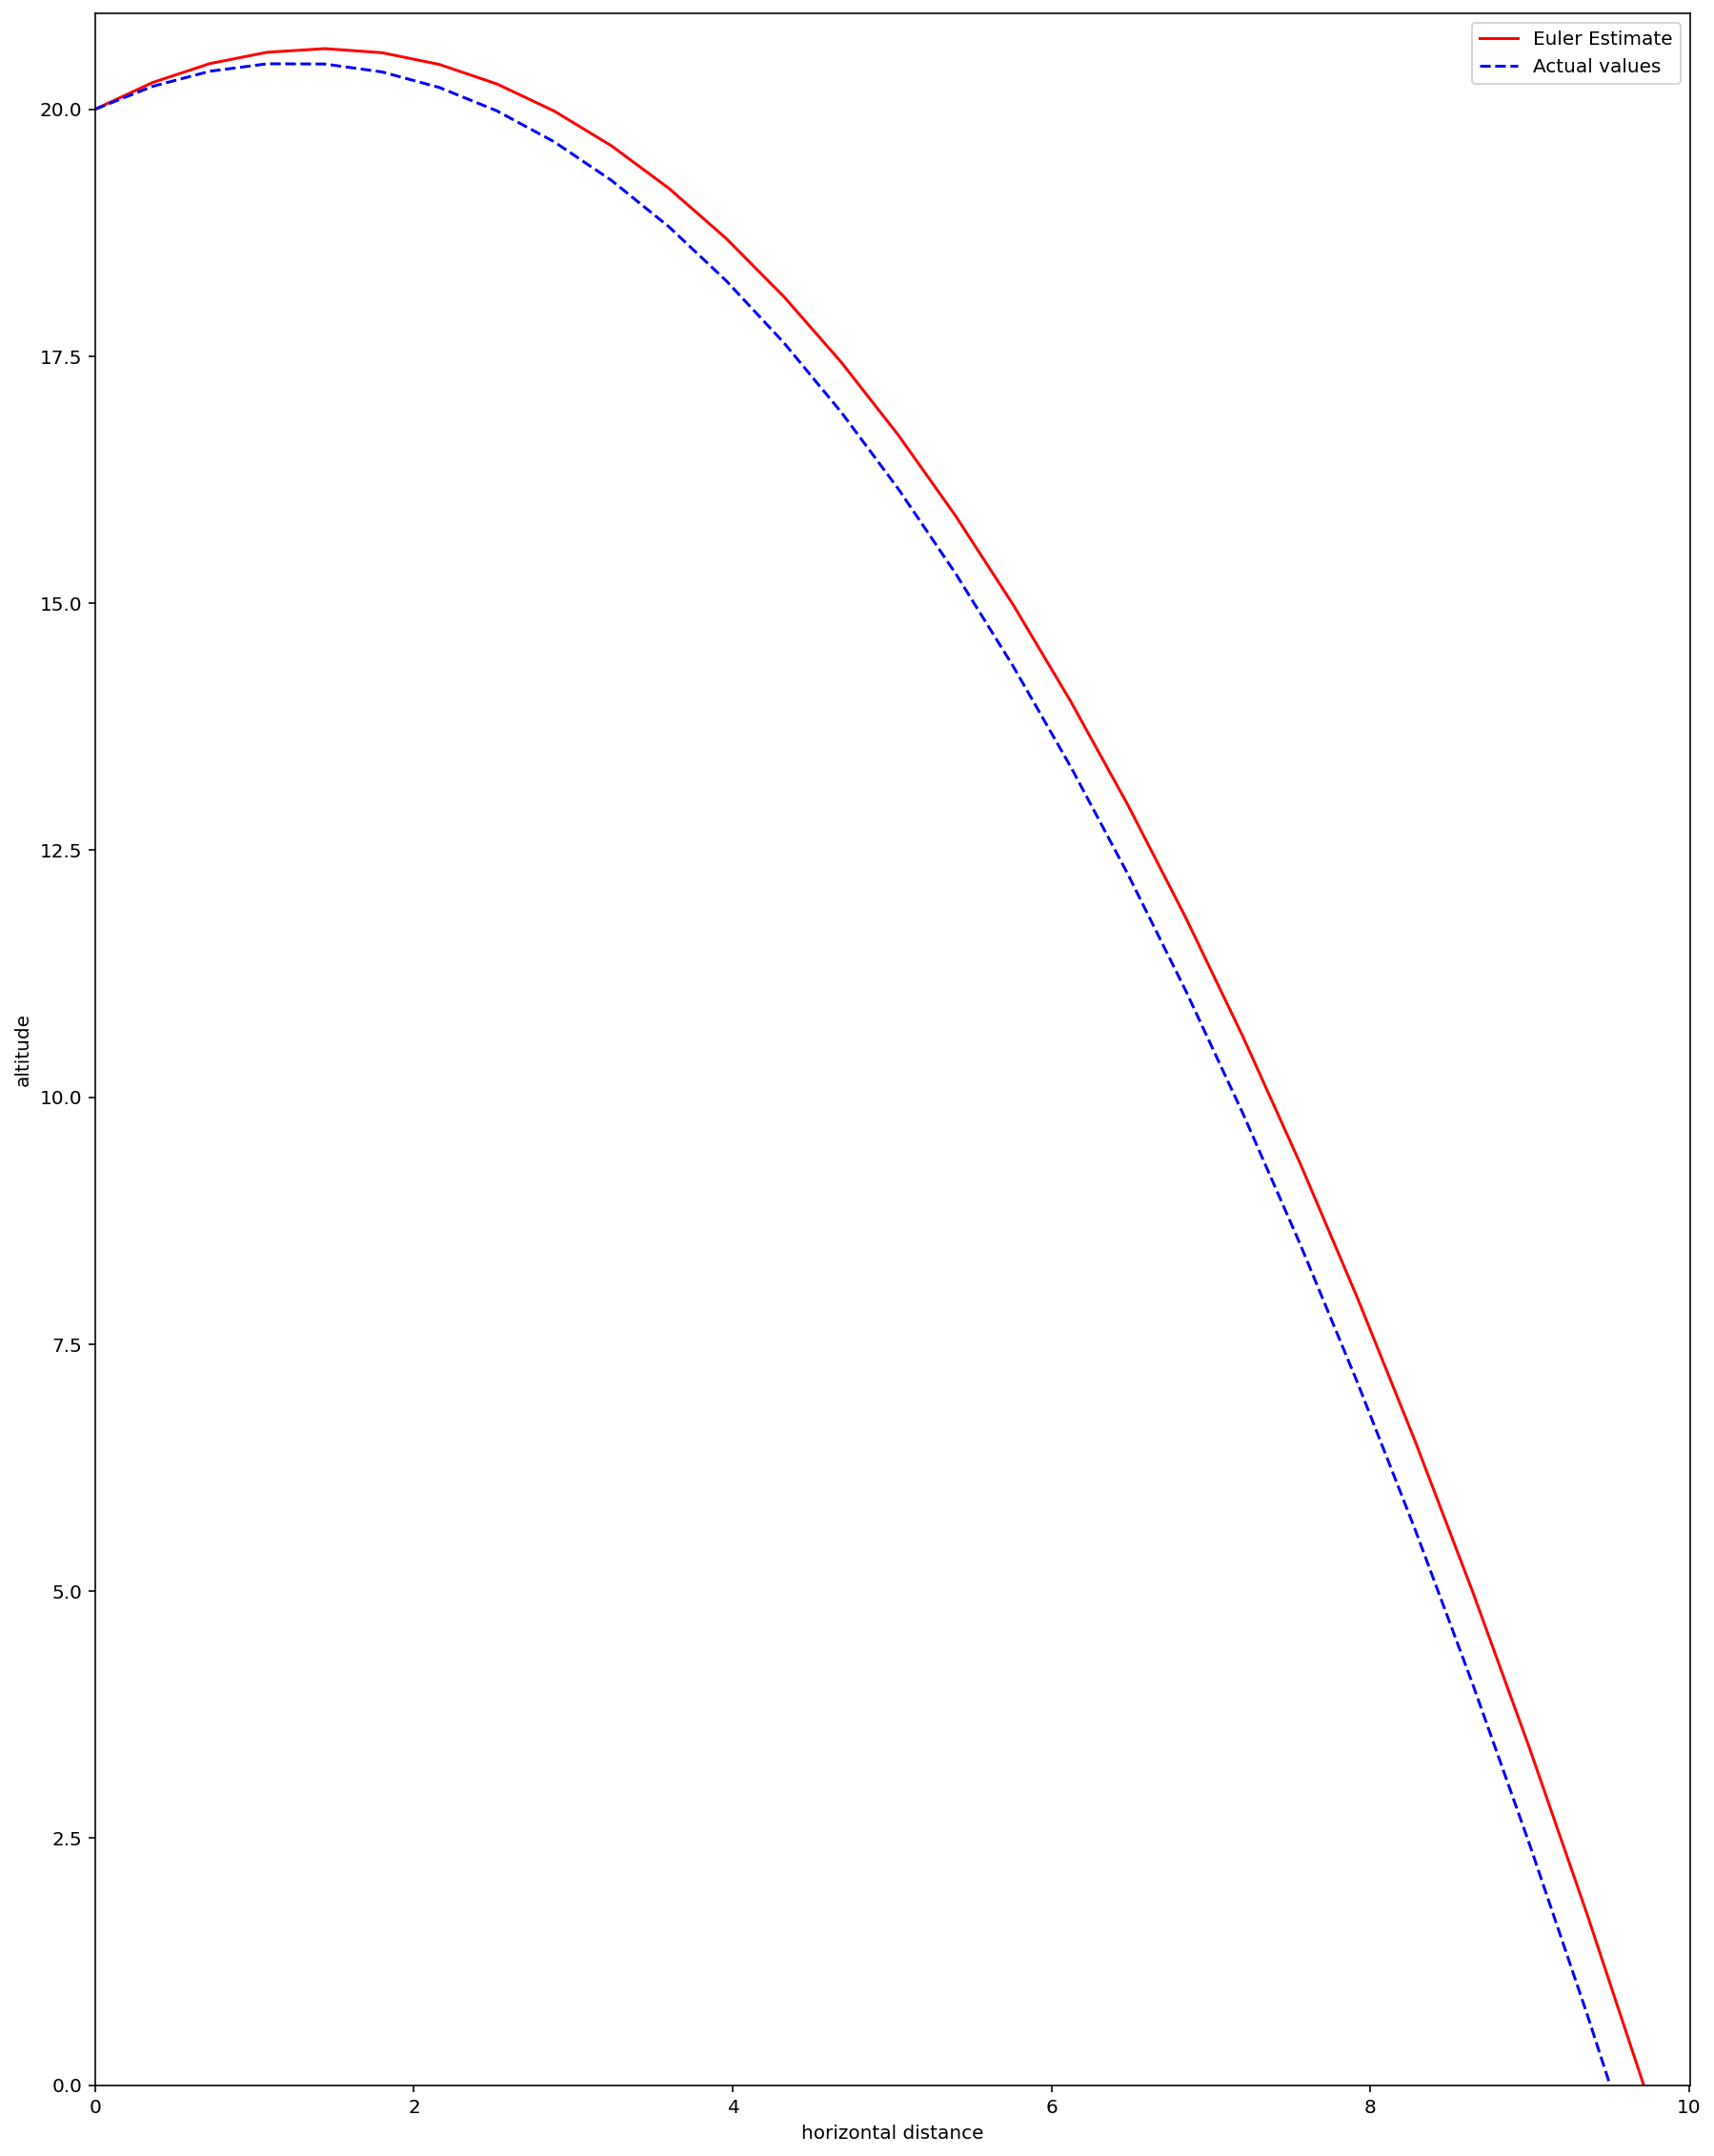

In [7]:
plt.plot(x, h, 'r', label='Euler Estimate')
h_actual=20 + initial_vertical_velocity* (t*time_step) - 0.5 * g * (t*time_step)**2
x_actual=initial_horizontal_velocity* (t*time_step)
plt.plot(x_actual, h_actual, 'b--', label='Actual values')
plt.ylim(0, initial_height+(initial_vertical_velocity**2)/(2* g)+ 0.5) # to ensure that the plot is perfectly zoomed in
plt.xlim(0, 2*initial_horizontal_velocity*initial_vertical_velocity/g + initial_horizontal_velocity*(-initial_vertical_velocity + (initial_vertical_velocity**2 + 2 * g * initial_height)**0.5)/(g) +0.5) #Again the same but with even worse math
plt.xlabel("horizontal distance")
plt.ylabel("altitude")
plt.legend()

## Planetary motion

Assuming plane of reference as plane of rotation, we can start with writing the equations. Since we are assuming a circular motion, we can safely say that $v_{total}= v_{orbital}$ i.e. $v_{radial}= 0$. 

Now we can also take Earth's current orbital velocity as $30 km/s$ = 3e4 m/s and the distance (assuming circular orbit) of the Earth from the sun as $1.5 \times 10^8 km$= 1.5e11 m

Now we will ensure that Keplar's law of constant angular momentum is followed for our approximation methods.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 12] # to determine the size of the graphs

Let us initialise the variables.

Since we are going to be plotting for years in the future, it would be better for us in terms of computation capacity to consider the time steps as 1 week. (1 week is a 1/52th of a revolution around the sun so a good approximation)

In [9]:
initial_orbital_velocity= 3e4
initial_radius=1.5e11
G_M= (initial_orbital_velocity**2 )* initial_radius

How are we going to approach this question?

We will have to deal with the following mathematical bullshittery-
1. Express position $\vec{r}$ as a vector ($2\times 1$ matrix).

2. $\frac{d}{dt}\vec{r}= \vec{v}$ where $\vec{v}$ is also a 2-D vector.

3. $\frac{d}{dt}\vec{v}= \frac{G\cdot M}{ ||r||^2} (-\hat{r})$

Our algorithm would be as follows-
1. First state $\vec{r_0}$ initially as $[initial\_radius, 0]^T$ and initial velocity $v_0$ as $[0, initial\_orbital\_velocity]^T$.
2. Now we will first calculate the change in $\vec{v}$ using Euler method i.e. $$\vec{v_{n+1}}=\vec{v_{n}}+ \frac{G\cdot M}{||r||^3}\times (-\vec{r_n})\cdot time\_step$$
3. Now we will use the new velocity to set the new position, again with the Euler method. $$\vec{r_{n+1}}=\vec{r_n}+ \vec{v_{n+1}}\cdot time\_step$$

In [10]:
#Now we will start off with a position and a velocity vector 1 cross 2
r=np.array([[initial_radius, 0]])
v=np.array([[0, initial_orbital_velocity]])

no_of_seconds_in_a_week=60*60*24*7
t=np.arange(0, 52*100, 1) # no. of time steps in 100 years
time_step=no_of_seconds_in_a_week # appropriate time step

for i in t:
    modr=np.linalg.norm(r[i])
    v=np.r_[v, [v[i]- time_step*G_M*r[i]/(modr)**3]] #We appended \frac{G\cdot M}{||r||^3}\times (-\vec{r_n})\cdot time\_step
    r=np.r_[r, [r[i] + time_step* v[i+1]]] #Update r with the new v

Now we can plot this graph properly

<IPython.core.display.Javascript object>


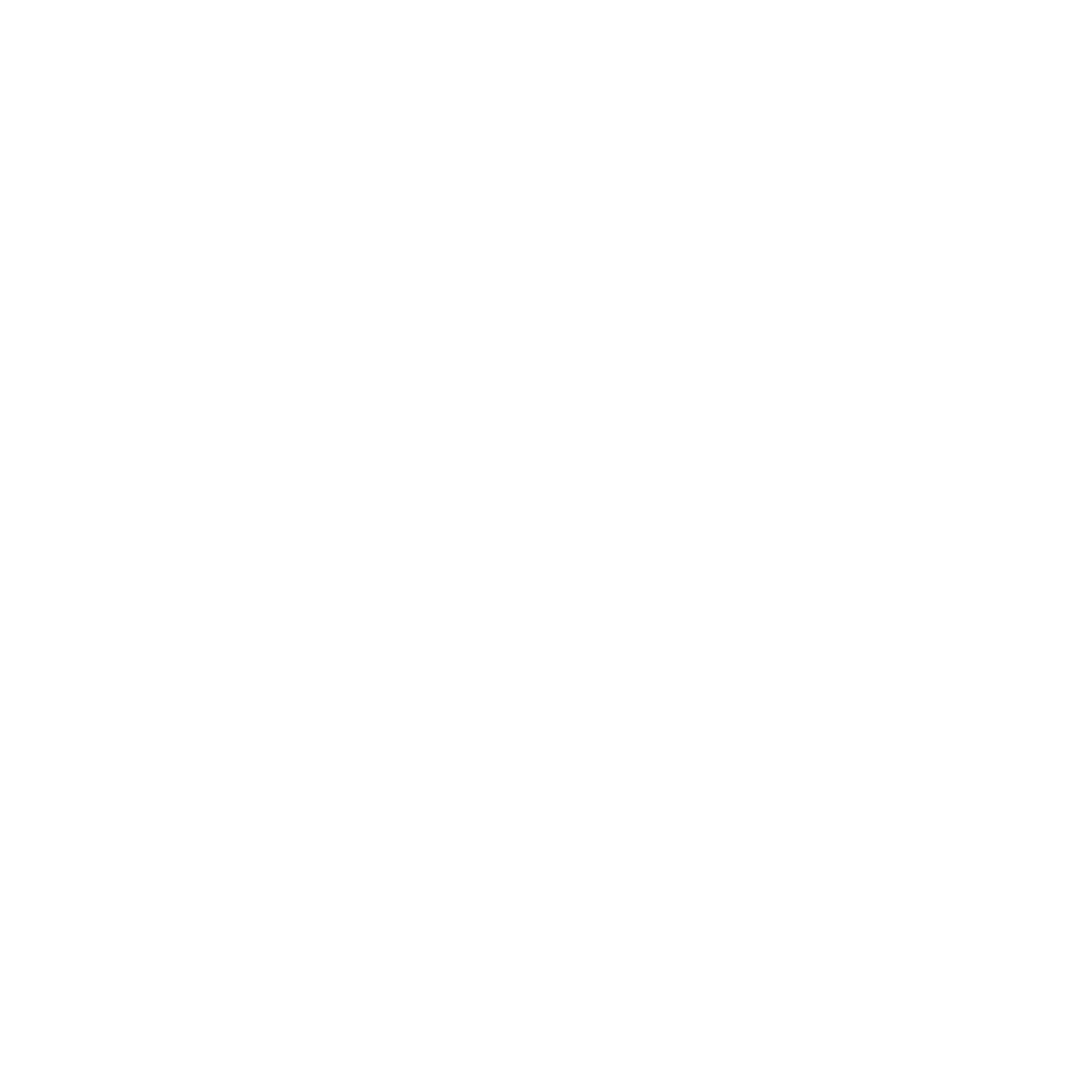

In [11]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(r[:,0], r[:,1], 'gray', label='Euler Estimate')
sample_points=np.arange(0,100,1)
r_actual_x=1.5e11*np.cos(sample_points*2*np.pi/100)
r_actual_y=1.5e11*np.sin(sample_points*2*np.pi/100)

plt.plot(r_actual_x, r_actual_y, color='gold', label='Actual values')
plt.plot(0, 0, marker="o", markersize=20, markeredgecolor="orange",markerfacecolor="gold")
plt.ylim(min(r[:,1])-1e10, max(r[:,1])+1e10) # to ensure that the plot is perfectly zoomed in
plt.xlim(min(r[:,0])-1e10, max(r[:,0])+1e10) #Again the same but with even worse math
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

plt.show()

### Now with RK-4 Method

We just need to change the way we evaluate our ODEs and we can easily plot our new estimate

We will have to deal with the following mathematical bullshittery-
1. Express position $\vec{r}$ as a vector ($2\times 1$ matrix).

2. $\frac{d}{dt}\vec{r}= \vec{v}$ where $\vec{v}$ is also a 2-D vector.

3. $\frac{d}{dt}\vec{v}= \frac{G\cdot M}{ ||r||^2} (-\hat{r})$

Our algorithm would be as follows-
1. First state $\vec{r_0}$ initially as $[initial\_radius, 0]^T$ and initial velocity $v_0$ as $[0, initial\_orbital\_velocity]^T$.
2. Now we will first calculate $v_{k1}, v_{k2}, v_{k3}, v_{k4}$ and $r_{k1}, r_{k2}, r_{k3}, r_{k4}$ using RK4 method i.e. 

$$r_{k1}= time\_step\cdot v[i] \quad\quad v_{k1}= -\frac{G\cdot M}{||r[i]||^3}\times (\vec{r[i]})\cdot time\_step$$

$$r_{k2}= time\_step\cdot (v[i] + \frac{v_{k1}}{2}) \quad\quad v_{k2}=-\frac{G\cdot M}{||r[i]+r_{k1}/2||^3}\times (\vec{r[i]+r_{k1}/2})\cdot time\_step $$

$$r_{k3}= time\_step\cdot (v[i] + \frac{v_{k2}}{2}) \quad\quad v_{k3}=-\frac{G\cdot M}{||r[i]+r_{k2}/2||^3}\times (\vec{r[i]+r_{k2}/2})\cdot time\_step $$

$$r_{k4}= time\_step\cdot (v[i] + v_{k3}) \quad\quad v_{k4}=-\frac{G\cdot M}{||r[i]+r_{k3}||^3}\times (\vec{r[i]+r_{k3}})\cdot time\_step $$
3. Now we will use these components to set the new velocity and positions
$$\vec{r[i+1]}=\vec{r[i]}+ \frac{r_{k1}+ 2\times r_{k2}+ 2\times r_{k3}+ r_{k4}}{6}$$
$$\vec{v[i+1]}=\vec{v[i]}+ \frac{v_{k1}+ 2\times v_{k2}+ 2\times v_{k3}+ v_{k4}}{6}$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 12] # to determine the size of the graphs

In [13]:
initial_orbital_velocity= 3e4
initial_radius=1.5e11
G_M= (initial_orbital_velocity**2 )* initial_radius

In [14]:
r=np.array([[initial_radius, 0]])
v=np.array([[0, initial_orbital_velocity]])

no_of_seconds_in_a_week=60*60*24*7
t=np.arange(0, 52*100, 1) # no. of time steps in 100 years
time_step=no_of_seconds_in_a_week # appropriate time step

for i in t:
    modr=np.linalg.norm(r[i])
    
    rk1=time_step* v[i]
    vk1= -time_step*G_M*r[i]/(modr)**3
    
    modr=np.linalg.norm(r[i]+ rk1/2)
    rk2=time_step* (v[i]+ vk1/2)
    vk2= -time_step*G_M*(r[i]+ rk1/2)/(modr)**3
    
    modr=np.linalg.norm(r[i]+ rk2/2)
    rk3=time_step* (v[i]+ vk2/2)
    vk3= -time_step*G_M*(r[i]+ rk2/2)/(modr)**3
    
    modr=np.linalg.norm(r[i]+ rk3)
    rk4=time_step* (v[i]+ vk3)
    vk4= -time_step*G_M*(r[i]+ rk3)/(modr)**3
    
    
    
    v=np.r_[v, [v[i] + (vk1+2*vk2+2*vk3+vk4)/6]] #We appended \frac{G\cdot M}{||r||^3}\times (-\vec{r_n})\cdot time\_step
    r=np.r_[r, [r[i] + (rk1+2*rk2+2*rk3+rk4)/6]] #Update r with the new v
r

array([[1.50000000e+11, 0.00000000e+00],
       [1.48903985e+11, 1.80997542e+10],
       [1.45631964e+11, 3.59350071e+10],
       ...,
       [1.19462908e+11, 9.05988559e+10],
       [1.07649259e+11, 1.04360734e+11],
       [9.42603326e+10, 1.16595456e+11]])

<IPython.core.display.Javascript object>


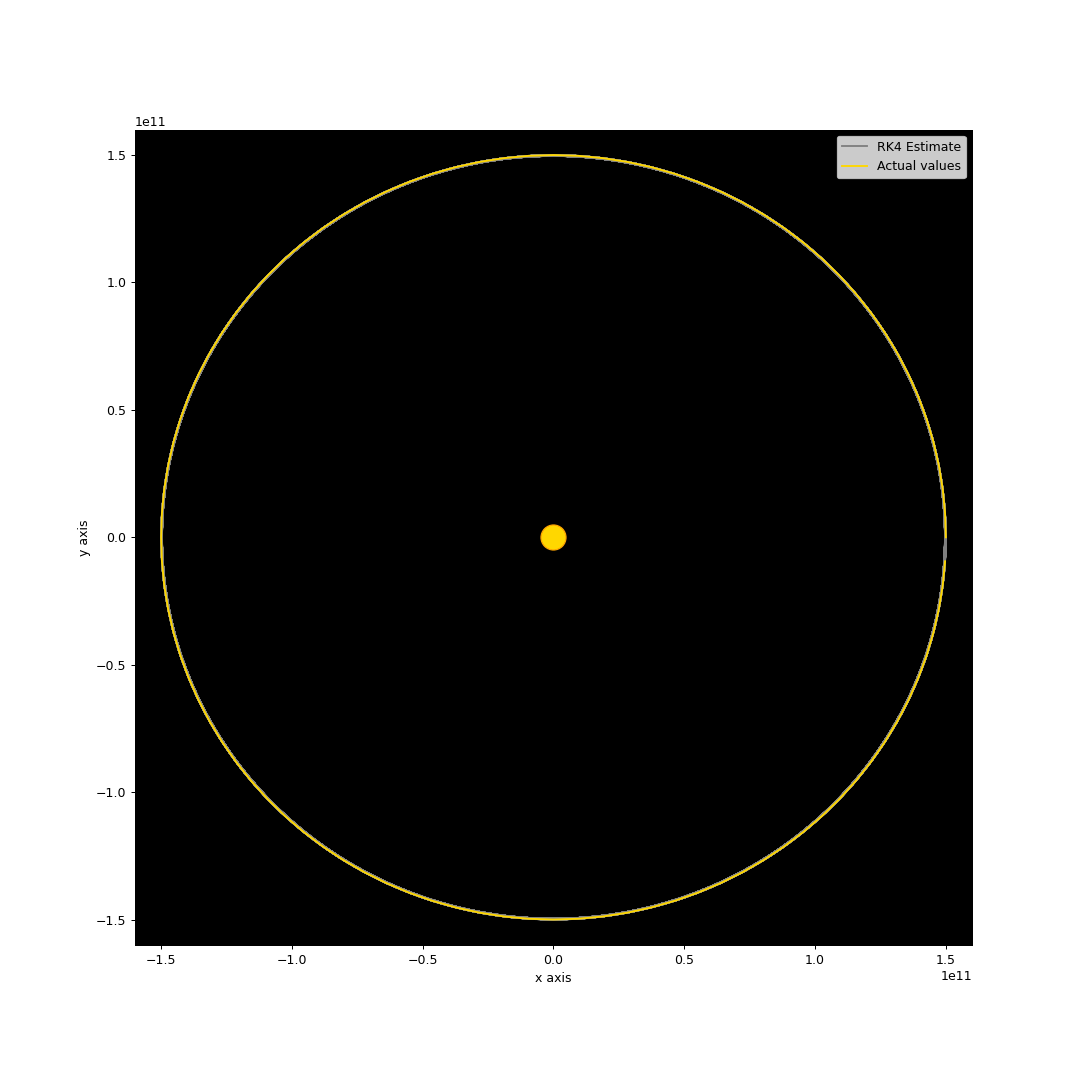

In [15]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(r[:,0], r[:,1], 'gray', label='RK4 Estimate')
sample_points=np.arange(0,100,1)
r_actual_x=1.5e11*np.cos(sample_points*2*np.pi/100)
r_actual_y=1.5e11*np.sin(sample_points*2*np.pi/100)

plt.plot(r_actual_x, r_actual_y, color='gold', label='Actual values')
plt.plot(0, 0, marker="o", markersize=20, markeredgecolor="orange",markerfacecolor="gold")
plt.ylim(min(r[:,1])-1e10, max(r[:,1])+1e10) # to ensure that the plot is perfectly zoomed in
plt.xlim(min(r[:,0])-1e10, max(r[:,0])+1e10) #Again the same but with even worse math
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()
plt.show()

You can clearly see the extreme difference in accuracy from just this small example. (For seeing it better, just change the line %matplotlib inline to %matplotlib notebook)